# Explore here

El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

In [44]:
# Your code here
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
total_data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [45]:
total_data.to_csv("../data/raw/total_data.csv", index = False)

Exploracion

In [46]:
total_data.shape


(41188, 21)

The DataFrame contains 41188 records (rows) and 21 variables (columns).

In [47]:

# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [48]:
total_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [49]:

duplicados=total_data.duplicated().sum()
duplicados

12

In [50]:
total_data_sinduplicados = total_data.drop_duplicates()
total_data_sinduplicados 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [51]:
duplicados=total_data_sinduplicados .duplicated().sum()
duplicados

0

In [52]:
total_data_sinduplicados.info

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

Let’s see the size of it and let’s analyze a bit the main metrics regarding its “y” label:

In [53]:
total_data_sinduplicados.drop([ 'day_of_week', "contact", "pdays"], axis = 1, inplace = True)
#, "nr.employed"
total_data_sinduplicados.head()

/tmp/ipykernel_37175/2329856365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data_sinduplicados.drop([ 'day_of_week', "contact", "pdays"], axis = 1, inplace = True)


,age,job,marital,education,default,housing,loan,month,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,may,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,may,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,may,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,may,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,may,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [54]:
total_data_sinduplicados.to_csv("../data/raw/total_data_sinduplicados.csv", index = False)

In [55]:
import pandas as pd
total_data_sinduplicados.loc[:, 'job_n'] = pd.factorize(total_data_sinduplicados['job'])[0]
total_data_sinduplicados.loc[:, 'marital_n'] = pd.factorize(total_data_sinduplicados['marital'])[0]
total_data_sinduplicados.loc[:, 'education_n'] = pd.factorize(total_data_sinduplicados['education'])[0]
total_data_sinduplicados.loc[:, 'default_n'] = pd.factorize(total_data_sinduplicados['default'])[0]
total_data_sinduplicados.loc[:, 'housing_n'] = pd.factorize(total_data_sinduplicados['housing'])[0]
total_data_sinduplicados.loc[:, 'loan_n'] = pd.factorize(total_data_sinduplicados['loan'])[0]

total_data_sinduplicados.loc[:, 'poutcome_n'] = pd.factorize(total_data_sinduplicados['poutcome'])[0]

total_data_sinduplicados.loc[:, 'y_n'] = pd.factorize(total_data_sinduplicados['y'])[0]
total_data_sinduplicados.loc[:, 'month_n'] = pd.factorize(total_data_sinduplicados['month'])[0]

total_data_sinduplicados.head(5)


/tmp/ipykernel_37175/317087282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data_sinduplicados.loc[:, 'job_n'] = pd.factorize(total_data_sinduplicados['job'])[0]
/tmp/ipykernel_37175/317087282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data_sinduplicados.loc[:, 'marital_n'] = pd.factorize(total_data_sinduplicados['marital'])[0]
/tmp/ipykernel_37175/317087282.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,age,job,marital,education,default,housing,loan,month,duration,campaign,...,y,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,y_n,month_n
0,56,housemaid,married,basic.4y,no,no,no,may,261,1,...,no,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,may,149,1,...,no,1,0,1,1,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,may,226,1,...,no,1,0,1,0,1,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,may,151,1,...,no,2,0,2,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,may,307,1,...,no,1,0,1,0,0,1,0,0,0


#### Paso 4. Análisis multivariante

correlacion


In [56]:
total_data_sinduplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   month           41176 non-null  object 
 8   duration        41176 non-null  int64  
 9   campaign        41176 non-null  int64  
 10  previous        41176 non-null  int64  
 11  poutcome        41176 non-null  object 
 12  emp.var.rate    41176 non-null  float64
 13  cons.price.idx  41176 non-null  float64
 14  cons.conf.idx   41176 non-null  float64
 15  euribor3m       41176 non-null  float64
 16  nr.employed     41176 non-null  float64
 17  y               41176 non-null  obje

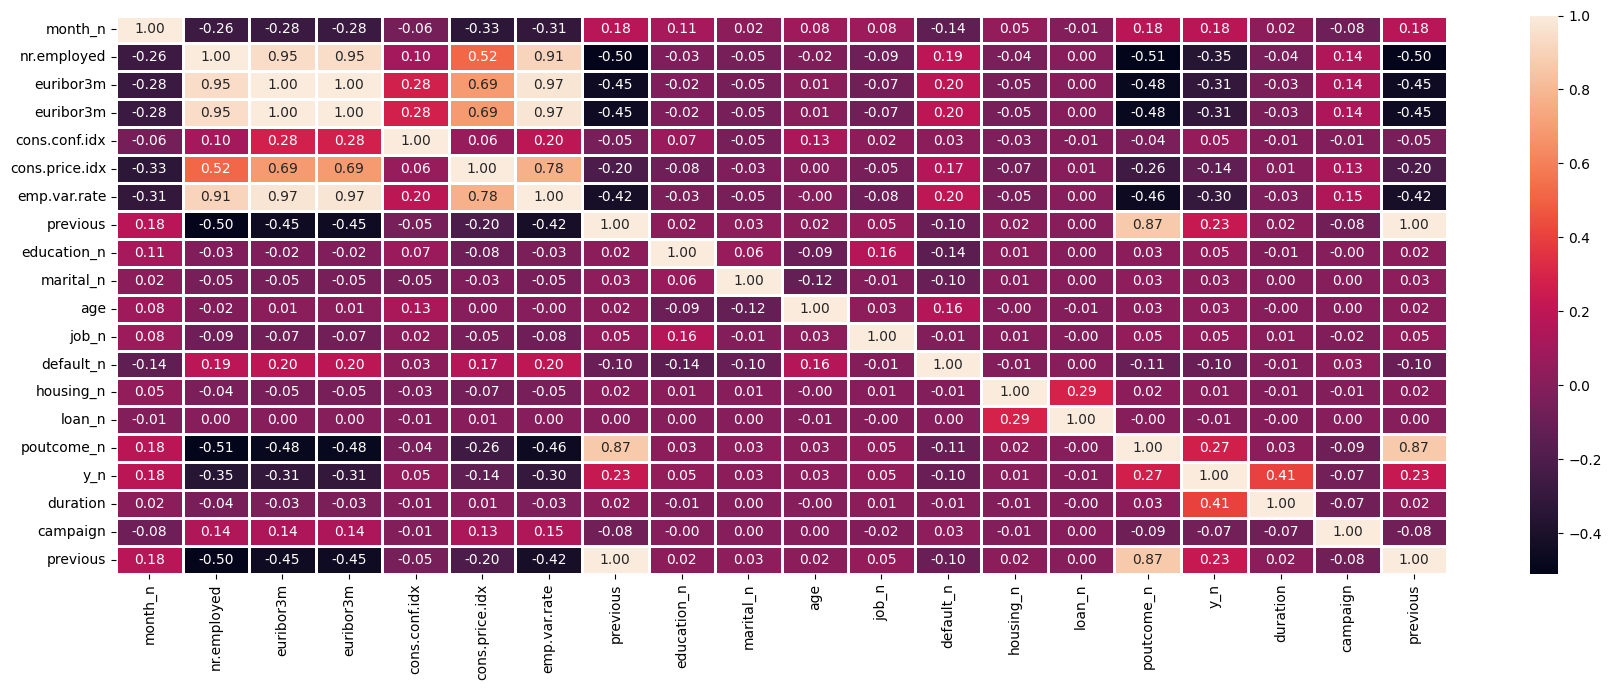

In [57]:
import matplotlib.pyplot as plt 
import seaborn as sns
fig, axis = plt.subplots(figsize = (18, 7))

sns.heatmap(total_data_sinduplicados[['month_n','nr.employed','euribor3m','euribor3m','cons.conf.idx','cons.price.idx','emp.var.rate','previous','education_n','marital_n','age','job_n', 'default_n', 'housing_n', 'loan_n', 'poutcome_n', 'y_n','duration', 'campaign', 'previous']].corr(), annot = True, fmt = ".2f",linecolor='white',linewidths=1)
#sns.heatmap(total_data_sinduplicados.corr(),annot = True, fmt = ".2f")
plt.tight_layout()

plt.show()

age. Edad del cliente (numérico)
job. Tipo de trabajo (categórico)
marital. Estado civil (categórico)
education. Nivel de educación (categórico)
default. ¿Tiene crédito actualmente? (categórico)
housing. ¿Tiene un préstamo de vivienda? (categórico)
loan. ¿Tiene un préstamo personal? (categórico)
contact. Tipo de comunicación de contacto (categórico)
month. Último mes en el que se le ha contactado (categórico)
day_of_week. Último día en el que se le ha contactado (categórico)
duration. Duración del contacto previo en segundos (numérico)
campaign. Número de contactos realizados durante esta campaña al cliente (numérico)
pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)
poutcome. Resultado de la campaña de marketing anterior (categórico)
emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)
cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)
cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico)
euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)
nr.employed. Número de empleados. Indicador trimestral (numérico)
y. TARGET. El cliente contrata un depósito a largo plazo o no.

categorical analiz

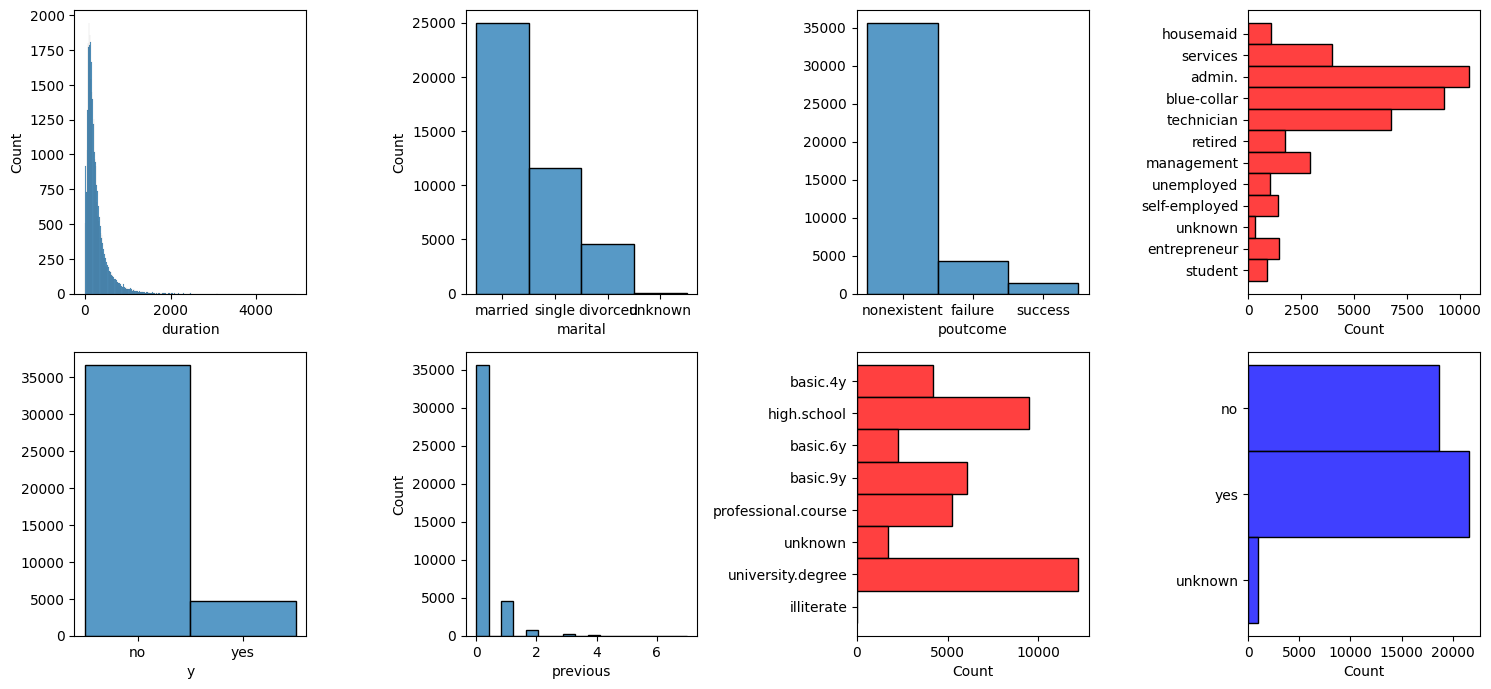

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 4, figsize=(15, 7))

# Crear histogramas
sns.histplot(ax=axis[0, 0], data=total_data_sinduplicados, x="duration")
sns.histplot(ax=axis[1, 0], data=total_data_sinduplicados, x="y").set(ylabel=None)
sns.histplot(ax=axis[0, 1], data=total_data_sinduplicados, x="marital")
sns.histplot(ax=axis[1, 1], data=total_data_sinduplicados, x="previous")
sns.histplot(ax=axis[0, 2], data=total_data_sinduplicados, x="poutcome").set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=total_data_sinduplicados, y="education", color='red').set(ylabel=None)


sns.histplot(ax=axis[0, 3], data=total_data_sinduplicados, y="job", color='red').set(ylabel=None)
sns.histplot(ax=axis[1, 3], data=total_data_sinduplicados, y="housing", color='blue').set(ylabel=None)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


In this plots we can see:

-That the most clients are married follow by single.
-The most customers are also in housing loan but followed really close by the ones how are not.
-The most clients does not have a personal loan and the ones how have one are very few in comparison.
-We also can see that the most customers are working mostly in admin, blue-collar, technician and services areas.
-For the target graphic we clearly see that the ones how does not hire a long-term deposit are majority.
-The education area shows that the most clients have a university degree or high school degree.

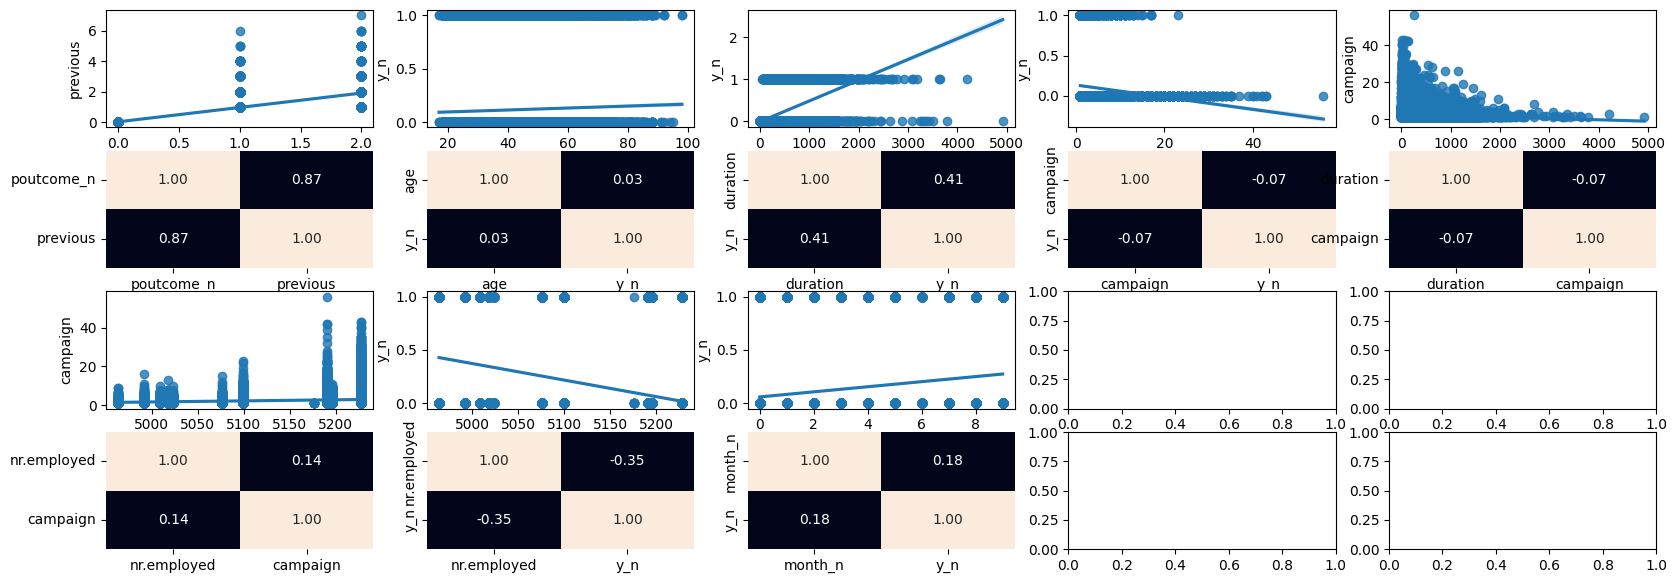

In [59]:
fig, axis = plt.subplots(4, 5, figsize = (20, 7))

sns.regplot(ax = axis[0, 0], data = total_data_sinduplicados , x = "poutcome_n", y = "previous")
sns.heatmap(total_data_sinduplicados[["poutcome_n", "previous"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data_sinduplicados , x = "age", y = "y_n")
sns.heatmap(total_data_sinduplicados[["age", "y_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0, 2], data = total_data_sinduplicados , x = "duration", y = "y_n")
sns.heatmap(total_data_sinduplicados[["duration", "y_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

sns.regplot(ax = axis[0, 3], data = total_data_sinduplicados , x = "campaign", y = "y_n")
sns.heatmap(total_data_sinduplicados[["campaign", "y_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3], cbar = False)

sns.regplot(ax = axis[0, 4], data = total_data_sinduplicados , x = "duration", y = "campaign")
sns.heatmap(total_data_sinduplicados[["duration", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 4], cbar = False)

sns.regplot(ax = axis[2, 0], data = total_data_sinduplicados , x = "nr.employed", y = "campaign")
sns.heatmap(total_data_sinduplicados[["nr.employed", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2, 1], data = total_data_sinduplicados , x = "nr.employed", y = "y_n")
sns.heatmap(total_data_sinduplicados[["nr.employed", "y_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)


sns.regplot(ax = axis[2, 2], data = total_data_sinduplicados , x = "month_n", y = "y_n")
sns.heatmap(total_data_sinduplicados[["month_n", "y_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2], cbar = False)



plt.show()

podemos observar
- hay fuerte relacion entre compañia anterior y resultados de compsñia anterior
- no hay relacion entre n empleados y y que esnuestro target
- hay relacion no muy fuerte entre mes y traget y
- hay fuerte relacion netre targer yduracion de llamada
- no hay ninguna relacion entre campanie anterior y targer
- tampoco hay relacion entre duracion d ellamada y campania anterior

numerical

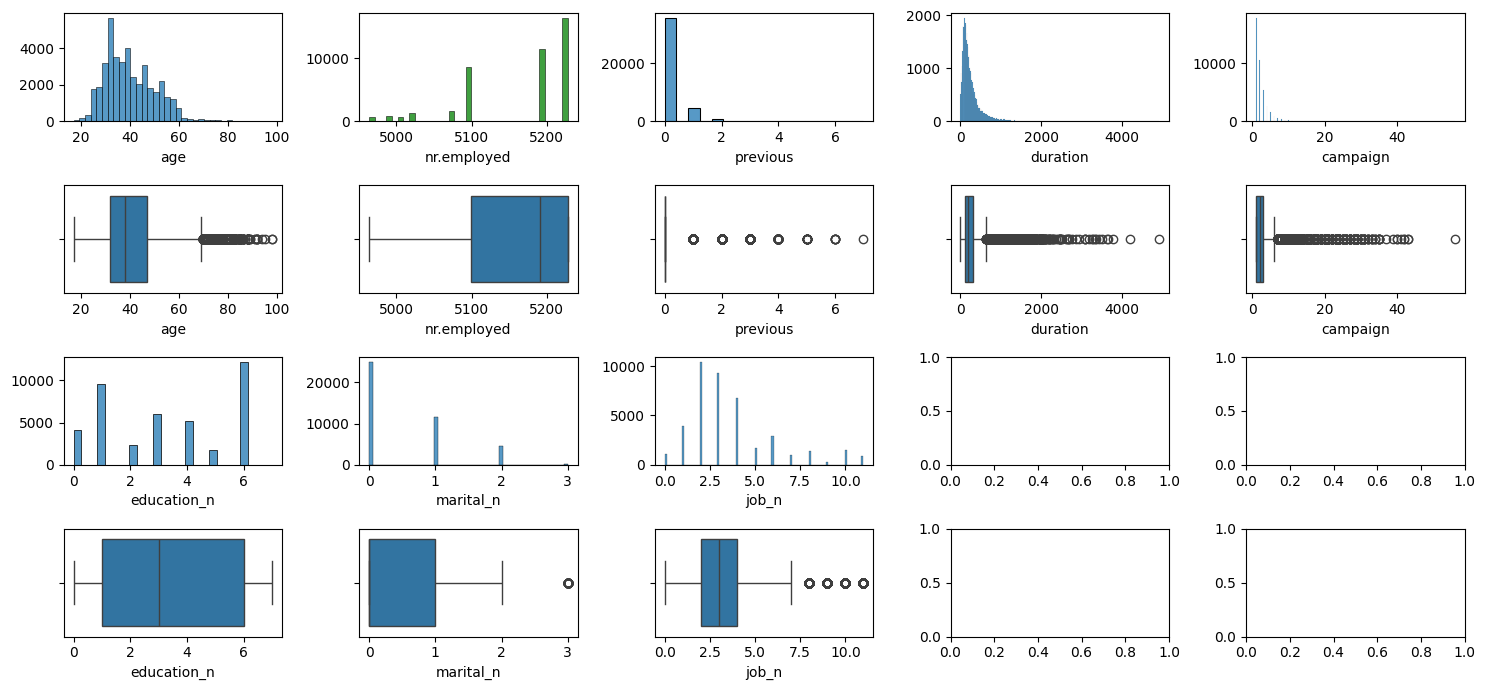

In [60]:

fig, axis = plt.subplots(4, 5, figsize = (15, 7))

sns.histplot(ax = axis[0, 0], data = total_data_sinduplicados, x = "age",bins=35).set(ylabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data_sinduplicados, x = "age")

sns.histplot(ax = axis[0, 1], data = total_data_sinduplicados, x = "nr.employed",bins=35, color='green').set(ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data_sinduplicados, x = "nr.employed")

sns.histplot(ax = axis[0, 2], data = total_data_sinduplicados, x = "previous").set(ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data_sinduplicados, x = "previous")

sns.histplot(ax = axis[0, 3], data = total_data_sinduplicados, x = "duration").set(ylabel = None)
sns.boxplot(ax = axis[1, 3], data = total_data_sinduplicados, x = "duration")

sns.histplot(ax = axis[0, 4], data = total_data_sinduplicados, x = "campaign").set(ylabel = None)
sns.boxplot(ax = axis[1, 4], data = total_data_sinduplicados, x = "campaign")

sns.histplot(ax = axis[2, 0], data = total_data_sinduplicados, x = "education_n").set(ylabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data_sinduplicados, x = "education_n")

sns.histplot(ax = axis[2, 1], data = total_data_sinduplicados, x = "marital_n").set(ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data_sinduplicados, x = "marital_n")

sns.histplot(ax = axis[2, 2], data = total_data_sinduplicados, x = "job_n").set(ylabel = None)
sns.boxplot(ax = axis[3, 2], data = total_data_sinduplicados, x = "job_n")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Lo podemos observar:
-la edad esta concentrada entre 25-70 años como maximo
-numero empleados entre 5100-5200
-numero llamadas realisadas anteriormente son muy pocas
-duracion de llamada esta concentrada entre 0y 500 min
-y numero de contactos realisados al cliente entre 0 y 10

Eliminamos outliers

In [61]:
total_data_sinduplicados.describe()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,y_n,month_n
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,3.673863,0.510637,3.277370,0.208908,0.571959,0.199825,0.169953,0.112663,2.249951
std,10.42068,259.305321,2.770318,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,2.454340,0.696794,2.185558,0.406713,0.541216,0.456055,0.455811,0.316184,2.429157
min,17.00000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,47.00000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
max,98.00000,4918.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,2.000000,1.000000,9.000000


In [62]:
age_stats = total_data_sinduplicados["age"].describe()
age_stats

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [63]:
age_iqr = age_stats["75%"] - age_stats["25%"]
upper_limit = age_stats["75%"] + 1.5 *age_iqr 
lower_limit  = age_stats["25%"] - 1.5 * age_iqr 

print(f"Los limites superior e inferior para la busqueda de outliers  {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(age_iqr, 2)}")

Los limites superior e inferior para la busqueda de outliers  69.5 and 9.5, with an interquartile range of 15.0


Por lo tanto, cualquier valor en la columna "age" que sea mayor que 69.5 o menor que 9.5 sería considerado un valor atípico.

In [65]:
# Eliminar outliers
total_data_sin_outliers = total_data_sinduplicados[(total_data_sinduplicados['age'] <= upper_limit) & (total_data_sinduplicados['age'] >= 17)]

In [66]:
total_data_sin_outliers.info('age')

<class 'pandas.core.frame.DataFrame'>
Index: 40708 entries, 0 to 41186
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40708 non-null  int64  
 1   job             40708 non-null  object 
 2   marital         40708 non-null  object 
 3   education       40708 non-null  object 
 4   default         40708 non-null  object 
 5   housing         40708 non-null  object 
 6   loan            40708 non-null  object 
 7   month           40708 non-null  object 
 8   duration        40708 non-null  int64  
 9   campaign        40708 non-null  int64  
 10  previous        40708 non-null  int64  
 11  poutcome        40708 non-null  object 
 12  emp.var.rate    40708 non-null  float64
 13  cons.price.idx  40708 non-null  float64
 14  cons.conf.idx   40708 non-null  float64
 15  euribor3m       40708 non-null  float64
 16  nr.employed     40708 non-null  float64
 17  y               40708 non-null  obje

In [67]:

employed_stats = total_data_sinduplicados["nr.employed"].describe()
employed_stats

count    41176.000000
mean      5167.034870
std         72.251364
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

In [68]:
employed_stats_iqr = employed_stats["75%"] - employed_stats["25%"]
upper_limit = employed_stats["75%"] + 1.5 *employed_stats_iqr 
lower_limit  = employed_stats["25%"] - 1.5 * employed_stats_iqr 

print(f"Los limites superior e inferior para la busqueda de outliers  {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(employed_stats_iqr, 2)}")

Los limites superior e inferior para la busqueda de outliers  5421.6 and 4905.6, with an interquartile range of 129.0


In [69]:
count_0 = total_data_sinduplicados[total_data_sinduplicados["nr.employed"] == 4906].shape[0]
count_1 = total_data_sinduplicados[total_data_sinduplicados["nr.employed"] == 5400].shape[0]
count_2 = total_data_sinduplicados[total_data_sinduplicados["nr.employed"] == 5200].shape[0]


print("Count of 0: ", count_0)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)


Count of 0:  0
Count of 1:  0
Count of 2:  0


In [70]:
# Eliminar outliers
total_data_sin_outliers = total_data_sin_outliers[(total_data_sin_outliers['nr.employed'] <= upper_limit) & (total_data_sin_outliers['nr.employed'] >= lower_limit)]

In [71]:
total_data_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   month           41176 non-null  object 
 8   duration        41176 non-null  int64  
 9   campaign        41176 non-null  int64  
 10  previous        41176 non-null  int64  
 11  poutcome        41176 non-null  object 
 12  emp.var.rate    41176 non-null  float64
 13  cons.price.idx  41176 non-null  float64
 14  cons.conf.idx   41176 non-null  float64
 15  euribor3m       41176 non-null  float64
 16  nr.employed     41176 non-null  float64
 17  y               41176 non-null  obje

In [73]:
global_stats = total_data_sin_outliers.info()
global_stats


<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   month           41176 non-null  object 
 8   duration        41176 non-null  int64  
 9   campaign        41176 non-null  int64  
 10  previous        41176 non-null  int64  
 11  poutcome        41176 non-null  object 
 12  emp.var.rate    41176 non-null  float64
 13  cons.price.idx  41176 non-null  float64
 14  cons.conf.idx   41176 non-null  float64
 15  euribor3m       41176 non-null  float64
 16  nr.employed     41176 non-null  float64
 17  y               41176 non-null  obje

In [ ]:
marital_n_stats = total_data_sin_outliers["marital_n"].describe()
marital_n_stats

marital_n_iqr = marital_n_stats["75%"] - marital_n_stats["25%"]
upper_limit = marital_n_stats ["75%"] + 1.5 * marital_n_iqr 
lower_limit  = marital_n_stats ["25%"] - 1.5 * marital_n_iqr

print(f"Los limites superior e inferior para la busqueda de outliers  {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(marital_n_iqr, 2)}")


Los limites superior e inferior para la busqueda de outliers  2.5 and -1.5, with an interquartile range of 1.0


In [ ]:
# Eliminar outliers
total_data_sin_outliers = total_data_sin_outliers[(total_data_sin_outliers['marital_n'] <= upper_limit) & (total_data_sin_outliers['marital_n'] >= 0)]

In [ ]:
total_data_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41096 entries, 0 to 41187
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41096 non-null  int64  
 1   job             41096 non-null  object 
 2   marital         41096 non-null  object 
 3   education       41096 non-null  object 
 4   default         41096 non-null  object 
 5   housing         41096 non-null  object 
 6   loan            41096 non-null  object 
 7   month           41096 non-null  object 
 8   duration        41096 non-null  int64  
 9   campaign        41096 non-null  int64  
 10  previous        41096 non-null  int64  
 11  poutcome        41096 non-null  object 
 12  emp.var.rate    41096 non-null  float64
 13  cons.price.idx  41096 non-null  float64
 14  cons.conf.idx   41096 non-null  float64
 15  euribor3m       41096 non-null  float64
 16  nr.employed     41096 non-null  float64
 17  y               41096 non-null  obje

In [74]:
job_n_stats = total_data_sin_outliers["job_n"].describe()
job_n_stats


count    41176.000000
mean         3.673863
std          2.454340
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: job_n, dtype: float64

In [75]:


job_n_stats_iqr = job_n_stats["75%"] - job_n_stats["25%"]
upper_limit = job_n_stats ["75%"] + 1.5 * job_n_stats_iqr  
lower_limit  = job_n_stats ["25%"] - 1.5 * job_n_stats_iqr 

print(f"Los limites superior e inferior para la busqueda de outliers  {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(marital_n_iqr, 2)}")

Los limites superior e inferior para la busqueda de outliers  7.0 and -1.0, with an interquartile range of 1.0


In [76]:

total_data_sin_outliers["job_n"] = total_data_sin_outliers["job_n"].fillna(total_data_sin_outliers["job_n"].median())


In [ ]:
total_data_sin_outliers.to_csv("../data/raw/total_data_sin_outliers.csv", index = False)

Dividimos en dos dataset. Featute escaling. Normalizacion

In [ ]:
total_data_sin_outliers.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'month', 'duration', 'campaign', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n',
       'poutcome_n', 'y_n', 'month_n'],
      dtype='object')

In [ ]:
total_data_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41096 entries, 0 to 41187
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41096 non-null  int64  
 1   job             41096 non-null  object 
 2   marital         41096 non-null  object 
 3   education       41096 non-null  object 
 4   default         41096 non-null  object 
 5   housing         41096 non-null  object 
 6   loan            41096 non-null  object 
 7   month           41096 non-null  object 
 8   duration        41096 non-null  int64  
 9   campaign        41096 non-null  int64  
 10  previous        41096 non-null  int64  
 11  poutcome        41096 non-null  object 
 12  emp.var.rate    41096 non-null  float64
 13  cons.price.idx  41096 non-null  float64
 14  cons.conf.idx   41096 non-null  float64
 15  euribor3m       41096 non-null  float64
 16  nr.employed     41096 non-null  float64
 17  y               41096 non-null  obje

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, SelectKBest
# Min-Max scaler




num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n","age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]


# Dividimos el conjunto de datos en características (X) y etiquetas (y)
X = total_data_sin_outliers.drop("y_n", axis=1)
y = total_data_sin_outliers["y_n"]
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

X_train





       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

      month  duration  campaign  ...  nr.employed  

,age,job,marital,education,default,housing,loan,month,duration,campaign,...,nr.employed,y,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,month_n
19877,36,technician,married,university.degree,no,yes,no,aug,124,1,...,5228.1,no,4,0,6,0,1,0,0,3
17117,42,blue-collar,single,basic.4y,no,yes,no,jul,112,2,...,5228.1,no,3,1,0,0,1,0,0,2
23160,48,services,married,basic.4y,unknown,yes,no,aug,1000,3,...,5228.1,yes,1,0,0,1,1,0,0,3
31991,47,admin.,single,basic.9y,no,no,no,may,253,2,...,5099.1,no,2,1,3,0,0,0,1,0
17261,49,technician,married,professional.course,unknown,no,no,jul,394,2,...,5228.1,no,4,0,4,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6276,37,technician,married,university.degree,no,yes,no,may,8,2,...,5191.0,no,4,0,6,0,1,0,0,0
11304,28,blue-collar,single,high.school,no,no,no,jun,1017,1,...,5228.1,no,3,1,1,0,0,0,0,1
38244,42,management,single,university.degree,no,no,no,oct,146,1,...,5017.5,yes,6,1,6,0,0,0,0,4
863,48,admin.,single,university.degree,no,yes,no,may,140,2,...,5191.0,no,2,1,6,0,1,0,0,0


In [77]:
# Feature selection

from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()



ValueError: could not convert string to float: 'technician'

In [79]:
# Con un valor de k = 6 queremos decir implícitamente que queremos eliminar características del conjunto de datos
selection_model = SelectKBest(f_regression, k = 5)
selection_model.fit(X_train, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)

X_train_sel.head()









ValueError: could not convert string to float: 'technician'

In [80]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False

SyntaxError: incomplete input (3835194256.py, line 4)

Logistic Regression model

In [ ]:
from sklearn.preprocessing import StandardScaler
from pickle import dump

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = predictoras)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = predictoras)

dump(scaler, open("/workspaces/ml_template/normalizer.sav", "wb"))

X_train_norm.head()

In [ ]:
df.to_csv()
nombre_df.to_excel()

In [ ]:
# X_train_norm, X_test_norm, y_train, y_test
# X_train_no_outliers_norm, X_test_no_outliers_norm, y_train, y_test

# GUARDAR LOS DOS DATASETS
# GUARDAR EL MODELO DE NORMALIZACIÓN (objeto scaler)

from pickle import load

scaler = load(open("/workspaces/ml_template/normalizer.sav", "rb"))

In [ ]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

NameError: name 'y_train' is not defined

Logistic Regression model

In [81]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/clean_train.csv'

In [ ]:
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

Model optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

In [ ]:
model = LogisticRegression(C = 0.1, penalty = "l2", solver = "liblinear")
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
from pickle import dump

dump(model, open("../models/logistic_regression_C-0.1_penalty-l2_solver-liblinear_42.sav", "wb"))

In [ ]:
grid.best_estimator_git 
